In [230]:
import numpy as np 
import matplotlib.pyplot as plt
import math 
from mpl_toolkits.mplot3d import axes3d

In [362]:
def Laguerre(n: int, x):
    
    # Series representation 
    l= 0
    for k in range(n + 1):
        l = l +  (math.comb(n, k)*((-x)**(k)) / math.factorial(k)) 

    return l

# Associated 
def Laguerre_Generalized(n: int, m: int, x):
    
    # Series representation 
    l= 0
    for k in range(n + 1):
        l = l +  (-1)**(k) * (math.comb(n + m, n - k)*((x)**(k)) / math.factorial(k)) 

    return l

def Radial_Function(n: int, l: int, r):
    
    if n - 1 < l:
        print("Error: n - 1 < l")
        return 0
    
    a = 0.529 * 10 ** (-10)
    #a = 1
    Z = 1
    
    c = - np.sqrt(( (2*Z)/(n*a))**3 * (math.factorial(n - l - 1)/(2*n*(math.factorial(n + l))**3)))
    print(c)
    rho = 2*Z*r/(n*a)
    
    #return c * np.exp(-rho/2) * rho**(l) * Laguerre_Generalized(n + l, 2*l + 1, rho)
    return c * np.multiply(np.multiply(np.exp(-rho/2), rho**(l)), Laguerre_Generalized(n + l, 2*l + 1, rho))


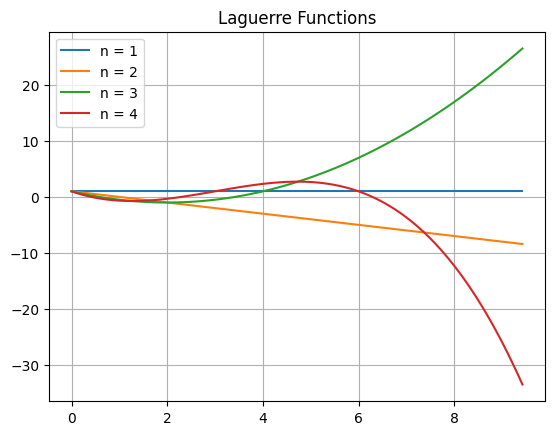

In [305]:
x = np.linspace(0, np.pi*3, 100)

for i in range(4): 
    plt.plot(x, Laguerre(i, x), label="n = " + str(i + 1) )

plt.title("Laguerre Functions")
plt.grid()
plt.legend()

In [367]:
x = np.linspace(-np.pi/2, np.pi/2, 101)
y = np.linspace(-np.pi/2, np.pi/2, 101)

-4912325266338.994


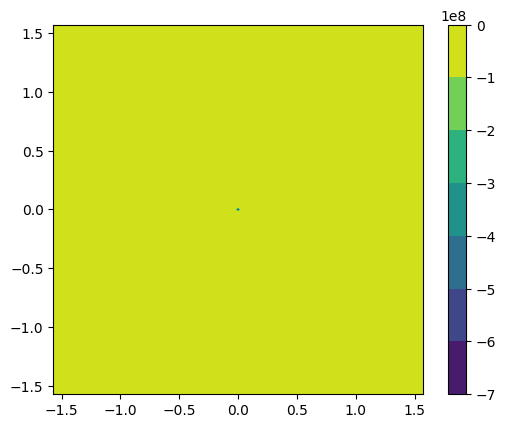

In [369]:
xs, ys = np.meshgrid(x, y, sparse=True)
a = 0.529 * 10 ** (-10)
r = np.sqrt(xs**2 + ys**2)
zs = Laguerre(2, r) 
zs2 = Radial_Function(3,1, r) 

plt.contourf(x, y, zs2)
plt.axis('scaled')
plt.colorbar()
plt.show()


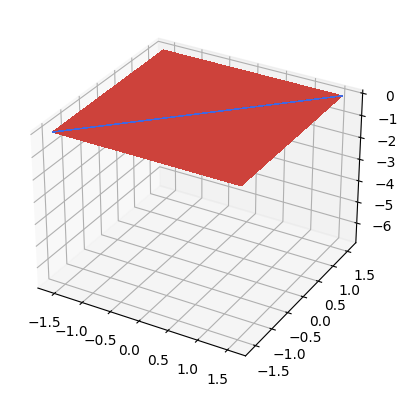

In [370]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(x, y, zs2, edgecolor='royalblue', lw=0.5, rstride=4, cstride=8,
                alpha=0.3)
ax.contourf(x, y, zs2, zdir='z', offset=-100, cmap='coolwarm')
plt.show()